# Comprehensive Exploratory Data Analysis (EDA)
## Global Disaster Events Dataset

**Analyst**: Professional Data Scientist  
**Date**: February 19, 2026  
**Dataset**: Book1.csv - Historical Disaster Events Database

---

### Analysis Objectives:
1. Understand the structure and quality of disaster event data
2. Identify temporal patterns and trends in disaster occurrences
3. Analyze geographic distribution of disasters across continents and countries
4. Examine disaster types, their frequency, and impact severity
5. Assess human and economic impacts (deaths, injuries, damages)
6. Extract actionable insights for disaster risk management and policy-making

## 1. Import Required Libraries

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Inspect the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('Book1.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n" + "="*80)
print("First 5 rows:")
df.head()

Dataset loaded successfully!
Shape: 2,946 rows × 45 columns

First 5 rows:


,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.00,NaN,NaN,NaN,NaN,NaN,NaN,3.22,NaN,NaN,NaN,NaN
1,1903,12,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mount Karthala,Comoros (the),COM,Eastern Africa,Africa,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903,NaN,NaN,1903,NaN,NaN,17.00,NaN,NaN,NaN,NaN,NaN,NaN,3.48,NaN,NaN,NaN,NaN
2,1910,9006,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Burkina Faso,BFA,Western Africa,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.61,NaN,NaN,NaN,NaN
3,1910,9006,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,CPV,Western Africa,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.61,NaN,NaN,NaN,NaN
4,1910,5,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Algeria,DZA,Northern Africa,Africa,"Kabylie, Masqueray",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,Richter,36,4,13:36,NaN,1910,6.00,24.00,1910,6.00,24.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN,3.61,NaN,NaN,NaN,NaN


In [4]:
# Display last 5 rows
print("Last 5 rows:")
df.tail()

Last 5 rows:


,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
2941,2021,9639,DR-2021-00065,Natural,Climatological,Drought,Drought,NaN,NaN,South Sudan,SSD,Northern Africa,Africa,"Aweil South (Northern Bahr el Gazzal State), A...",NaN,Food shortage,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2021,NaN,NaN,2021,9.00,NaN,NaN,NaN,18000.00,NaN,18000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2942,2021,240,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Uganda,UGA,Eastern Africa,Africa,Butaleja District (Eastern Region); the Northe...,Heavy rains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,Manafwa and the Nakwasi Rivers,2021,5.00,6.00,2021,5.00,10.00,1.00,NaN,75000.00,NaN,75000.00,NaN,NaN,NaN,1,743;744;745;746;763;764;765;767;772;773;775;77...,NaN,"Abim, Adjumani, Agago, Alebtong, Amolatar, Amu..."
2943,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,ZAF,Southern Africa,Africa,"Mpumalanga Province, Free State Province and t...",Heavy rains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2021,2.00,1.00,2021,2.00,15.00,31.00,NaN,400.00,NaN,400.00,NaN,75000.00,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
2944,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,Tshopo province,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Vaccinated,NaN,NaN,NaN,NaN,2021,9.00,7.00,2021,9.00,13.00,131.00,301.00,NaN,NaN,301.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2945,2021,481,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Sudan,SSD,Northern Africa,Africa,"Mayendit County (Unity); Ayod, Fangak Counties...",Heavy rains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,"Nile, Lol and Sobat rivers",2021,5.00,NaN,2021,10.00,7.00,7.00,NaN,500000.00,NaN,500000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Random sample for diversity
print("Random sample of 10 rows:")
df.sample(10)

Random sample of 10 rows:


,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
2277,2011,9663,OT-2012-000049,Natural,Climatological,Drought,Drought,NaN,NaN,Sudan (the),SDN,Northern Africa,Africa,Abyei district (Southern Kordofan province),NaN,Food shortage,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2012,NaN,NaN,2012,NaN,NaN,NaN,NaN,3200000.00,NaN,3200000.00,NaN,NaN,86.91,2,NaN,4151,Abyei (Adm2).
2127,2010,613,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Morocco,MAR,Northern Africa,Africa,"Tiflet area (Khémisset district, Rabat - Salé ...",Heavy rains,Transport accident,NaN,NaN,NaN,NaN,NaN,180760.00,Km2,9.77,-66.93,NaN,NaN,2010,11.00,25.00,2010,12.00,6.00,32.00,3.00,75000.00,NaN,75003.00,NaN,29000.00,84.25,2,NaN,21787;21794;21810;21812;21813;21814;147339;147...,"Al Hoceima, Ben Slimane, Casablanca, Kh??misse..."
1353,2002,515,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Sudan (the),SDN,Northern Africa,Africa,"En Nuhud, Ghebeish districts (Northern Kordofa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2002,8.00,3.00,2002,8.00,3.00,NaN,NaN,100000.00,NaN,100000.00,NaN,NaN,69.50,1;2,2745;2753;2770,4151;37146;37147;37148;37149,"Al Jazeera, Khartoum, White Nile (Adm1). Abyei..."
622,1990,33,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Uganda,UGA,Eastern Africa,Africa,Moyo area,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Richter,NaN,NaN,NaN,NaN,1990,5.00,20.00,1990,5.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.48,NaN,NaN,NaN,NaN
2723,2019,382,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Sierra Leone,SLE,Western Africa,Africa,"Bathurst, Kroo Bay, Kissy, Wellington, Calaba",Hevay rains,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2019,8.00,2.00,2019,8.00,3.00,7.00,NaN,5000.00,NaN,5000.00,NaN,NaN,98.78,2,NaN,111380;111381,"Western Area Rur, Western Area Urb (Adm2)."
1822,2008,444,FF-2008-000178,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Algeria,DZA,Northern Africa,Africa,Ghardaia province,Heavy rains,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,34760.00,Km2,3.48,32.24,NaN,NaN,2008,10.00,1.00,2008,10.00,17.00,93.00,50.00,59000.00,NaN,59050.00,NaN,348000.00,83.19,1,360,NaN,Ghardaia (Adm1).
958,1999,476,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,NaN,Ethiopia,ETH,Eastern Africa,Africa,Kobo area (North Wollo zone) and Tigray Region,NaN,NaN,NaN,NaN,No,No,NaN,64500.00,Vaccinated,NaN,NaN,NaN,NaN,1999,2.00,NaN,1999,3.00,NaN,9.00,NaN,276.00,NaN,276.00,NaN,NaN,64.36,NaN,NaN,NaN,NaN
490,1988,277,NaN,Natural,Meteorological,Storm,Convective storm,Hail,NaN,Chad,TCD,Middle Africa,Africa,Biltine prefecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1988,6.00,25.00,1988,6.00,25.00,11.00,NaN,1200.00,NaN,1200.00,NaN,157.00,45.69,NaN,NaN,NaN,NaN
607,1989,274,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Somalia,SOM,Eastern Africa,Africa,"Skushban, Bosasso, Kandala (East Somalia)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1989,3.00,NaN,1989,3.00,NaN,34.00,NaN,NaN,NaN,NaN,NaN,NaN,47.90,NaN,NaN,NaN,NaN
35,1968,53,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Ghana,GHA,Western Africa,Africa,"Central, South",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1968,7.00,NaN,1968,7.00,NaN,NaN,NaN,25000.00,NaN,25000.00,NaN,74700.00,13.44,NaN,NaN,NaN,NaN


## 3. Dataset Overview and Basic Information

In [6]:
# Dataset information
print("Dataset Info:")
print("="*80)
df.info()

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        2946 non-null   int64  
 1   Seq                         2946 non-null   int64  
 2   Glide                       465 non-null    str    
 3   Disaster Group              2946 non-null   str    
 4   Disaster Subgroup           2946 non-null   str    
 5   Disaster Type               2946 non-null   str    
 6   Disaster Subtype            2400 non-null   str    
 7   Disaster Subsubtype         77 non-null     str    
 8   Event Name                  914 non-null    str    
 9   Country                     2946 non-null   str    
 10  ISO                         2946 non-null   str    
 11  Region                      2946 non-null   str    
 12  Continent                   2946 non-null   str    
 13  Location                    26

In [7]:
# Column names
print(f"Total Columns: {len(df.columns)}")
print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Total Columns: 45

Column Names:
 1. Year
 2. Seq
 3. Glide
 4. Disaster Group
 5. Disaster Subgroup
 6. Disaster Type
 7. Disaster Subtype
 8. Disaster Subsubtype
 9. Event Name
10. Country
11. ISO
12. Region
13. Continent
14. Location
15. Origin
16. Associated Dis
17. Associated Dis2
18. OFDA Response
19. Appeal
20. Declaration
21. Aid Contribution
22. Dis Mag Value
23. Dis Mag Scale
24. Latitude
25. Longitude
26. Local Time
27. River Basin
28. Start Year
29. Start Month
30. Start Day
31. End Year
32. End Month
33. End Day
34. Total Deaths
35. No Injured
36. No Affected
37. No Homeless
38. Total Affected
39. Insured Damages ('000 US$)
40. Total Damages ('000 US$)
41. CPI
42. Adm Level
43. Admin1 Code
44. Admin2 Code
45. Geo Locations


In [8]:
# Memory usage
memory_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"\nTotal Memory Usage: {memory_usage:.2f} MB")


Total Memory Usage: 3.98 MB


## 4. Handle Missing Values

In [9]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
).reset_index(drop=True)

print(f"Columns with Missing Values: {len(missing_data)} out of {len(df.columns)}")
print("\nTop 20 Columns with Highest Missing Data:")
print("="*80)
missing_data.head(20)

Columns with Missing Values: 34 out of 45

Top 20 Columns with Highest Missing Data:


,Column,Missing_Count,Missing_Percentage,Data_Type
0,Insured Damages ('000 US$),2932,99.52,float64
1,Local Time,2905,98.61,str
2,Associated Dis2,2882,97.83,str
3,Disaster Subsubtype,2869,97.39,str
4,Aid Contribution,2817,95.62,float64
5,River Basin,2688,91.24,str
6,Latitude,2637,89.51,str
7,Longitude,2637,89.51,str
8,Total Damages ('000 US$),2615,88.76,float64
9,No Homeless,2507,85.10,float64


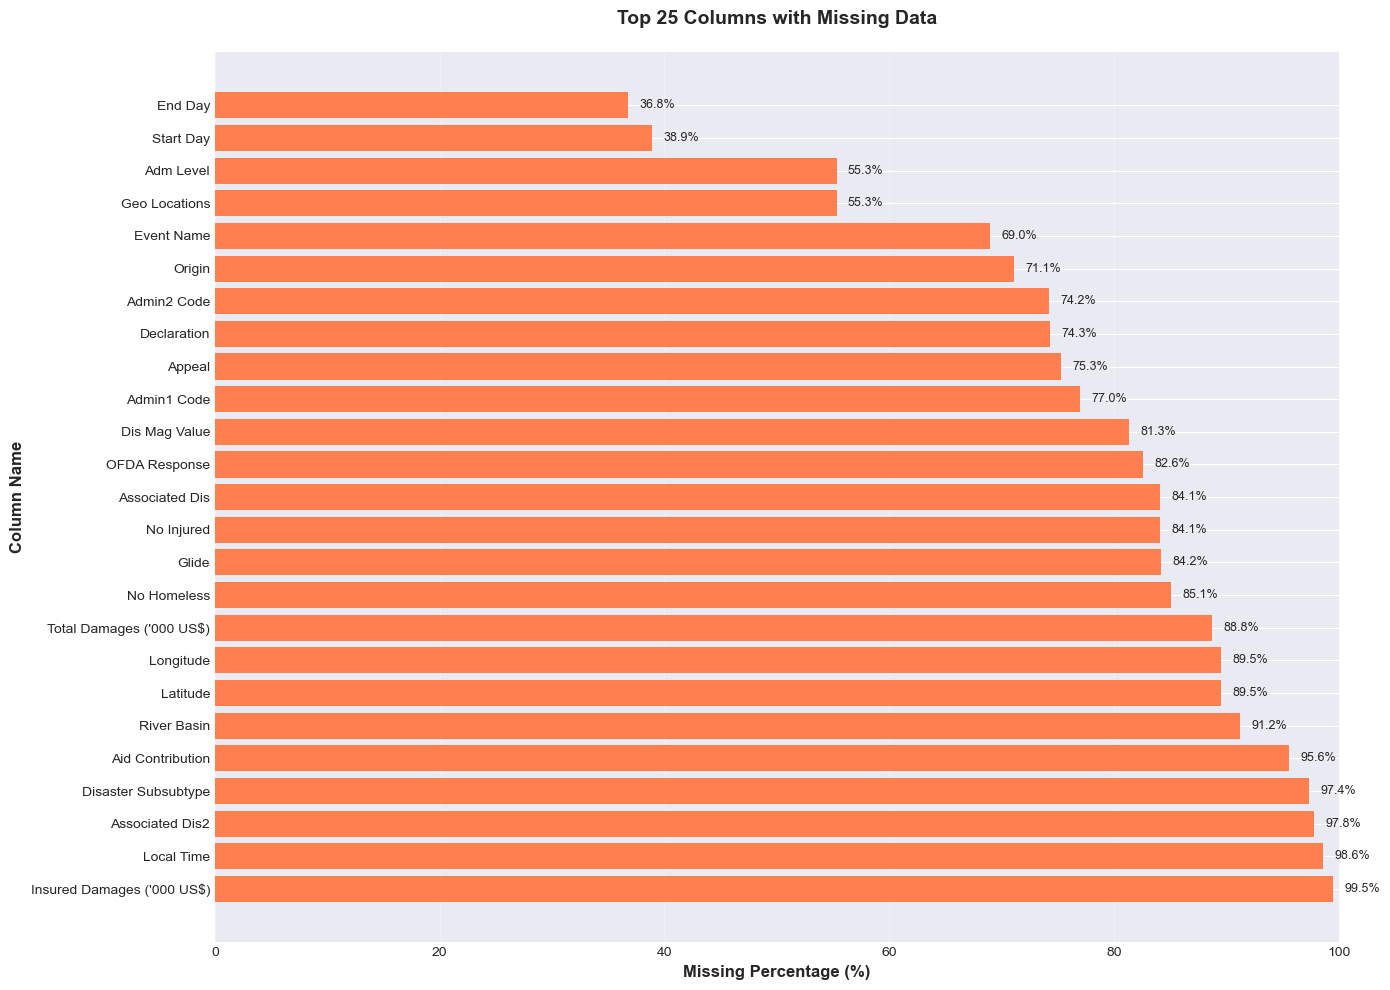

In [10]:
# Visualize missing data
plt.figure(figsize=(14, 10))
top_missing = missing_data.head(25)

plt.barh(top_missing['Column'], top_missing['Missing_Percentage'], color='coral')
plt.xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
plt.ylabel('Column Name', fontsize=12, fontweight='bold')
plt.title('Top 25 Columns with Missing Data', fontsize=14, fontweight='bold', pad=20)
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_missing['Missing_Percentage']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

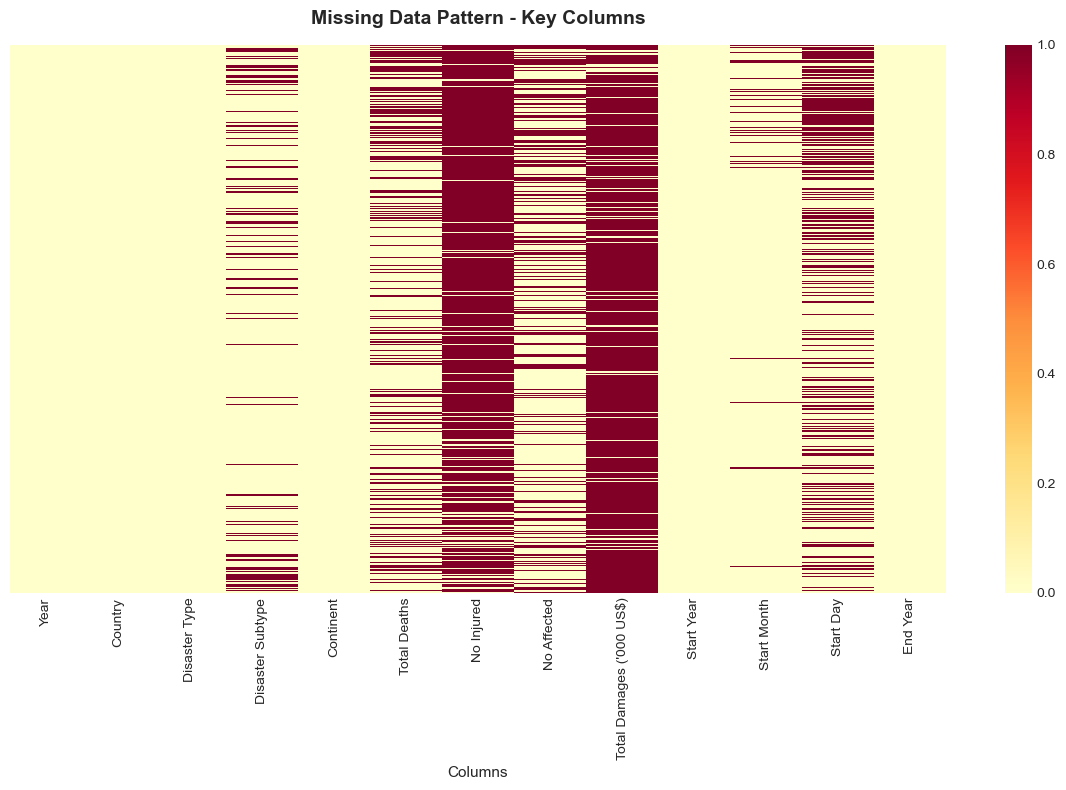

In [11]:
# Heatmap of missing data for key columns
key_columns = ['Year', 'Country', 'Disaster Type', 'Disaster Subtype', 'Continent', 
               'Total Deaths', 'No Injured', 'No Affected', 'Total Damages (\'000 US$)',
               'Start Year', 'Start Month', 'Start Day', 'End Year']

plt.figure(figsize=(12, 8))
sns.heatmap(df[key_columns].isnull(), cbar=True, yticklabels=False, cmap='YlOrRd')
plt.title('Missing Data Pattern - Key Columns', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Columns', fontsize=11)
plt.tight_layout()
plt.show()

## 5. Data Type Analysis and Conversions

In [12]:
# Data types summary
dtype_summary = df.dtypes.value_counts()
print("Data Type Distribution:")
print("="*50)
for dtype, count in dtype_summary.items():
    print(f"{dtype}: {count} columns")

# Separate columns by type
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric Columns: {len(numeric_cols)}")
print(f"Categorical Columns: {len(categorical_cols)}")

Data Type Distribution:
str: 27 columns
float64: 14 columns
int64: 4 columns

Numeric Columns: 18
Categorical Columns: 27


## 6. Statistical Summary of Numerical Features

In [13]:
# Descriptive statistics for all numeric columns
print("Descriptive Statistics - Numerical Features:")
print("="*100)
df.describe().T

Descriptive Statistics - Numerical Features:


,count,mean,std,min,25%,50%,75%,max
Year,2946.00,2000.84,15.85,1900.00,1996.00,2004.00,2011.00,2021.00
Seq,2946.00,1349.78,2870.74,1.00,128.00,358.00,566.00,9854.00
Aid Contribution,129.00,8354.03,25193.21,9.00,190.00,761.00,4524.00,193704.00
Dis Mag Value,550.00,146172.19,769119.43,-13.00,150.00,5135.00,65167.50,13025874.00
Start Year,2946.00,2000.87,15.83,1900.00,1996.00,2004.00,2011.00,2021.00
Start Month,2785.00,6.01,3.68,1.00,2.00,6.00,9.00,12.00
Start Day,1799.00,14.17,9.20,1.00,6.00,14.00,22.00,31.00
End Year,2946.00,2001.07,15.67,1900.00,1996.00,2004.00,2011.00,2021.00
End Month,2638.00,6.26,3.60,1.00,3.00,6.00,9.00,12.00
End Day,1862.00,15.79,9.01,1.00,8.00,16.00,23.00,31.00


In [14]:
# Key impact metrics
impact_cols = ['Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 
               'Total Affected', 'Total Damages (\'000 US$)', 'Insured Damages (\'000 US$)']

print("Impact Metrics Summary:")
print("="*100)
df[impact_cols].describe().T

Impact Metrics Summary:


,count,mean,std,min,25%,50%,75%,max
Total Deaths,2002.00,716.47,9798.96,1.00,8.00,21.00,68.00,300000.00
No Injured,468.00,1823.75,10758.99,1.00,13.75,50.00,283.25,180000.00
No Affected,2042.00,296458.24,1151222.49,1.00,992.50,8000.00,72790.50,23000000.00
No Homeless,439.00,23521.23,76761.77,19.00,892.00,3156.00,12796.50,1000000.00
Total Affected,2493.00,247311.30,1049172.86,1.00,679.00,5389.00,50000.00,23000000.00
Total Damages ('000 US$),331.00,114212.06,439549.94,9.00,2000.00,11400.00,71051.50,5200000.00
Insured Damages ('000 US$),14.00,94235.71,80083.57,1000.00,19750.00,85400.00,145750.00,248000.00


In [15]:
# Temporal coverage
print("Temporal Coverage:")
print("="*50)
print(f"Start Year Range: {df['Start Year'].min():.0f} - {df['Start Year'].max():.0f}")
print(f"Total Years Covered: {df['Start Year'].max() - df['Start Year'].min():.0f} years")
print(f"Year Range: {df['Year'].min():.0f} - {df['Year'].max():.0f}")

Temporal Coverage:
Start Year Range: 1900 - 2021
Total Years Covered: 121 years
Year Range: 1900 - 2021


## 7. Univariate Analysis - Numerical Features

In [16]:
# Distribution of disasters over years - Interactive
yearly_counts = df['Year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['Year', 'Count']

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Distribution of Disaster Events Over Time', 
                                    'Disaster Frequency Trend Over Time'))

# Histogram
fig.add_trace(
    go.Histogram(x=df['Year'], nbinsx=50, marker_color='steelblue',
                 name='Year Distribution',
                 hovertemplate='Year: %{x}<br>Count: %{y}<extra></extra>'),
    row=1, col=1
)

# Line chart with area
fig.add_trace(
    go.Scatter(x=yearly_counts['Year'], y=yearly_counts['Count'],
               mode='lines', fill='tozeroy',
               line=dict(color='darkred', width=2),
               fillcolor='rgba(255, 127, 80, 0.3)',
               name='Disaster Trend',
               hovertemplate='Year: %{x}<br>Disasters: %{y}<extra></extra>'),
    row=1, col=2
)

fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Number of Disasters", row=1, col=2)

fig.update_layout(height=400, showlegend=False, hovermode='x unified',
                  template='plotly_white')
fig.show()

In [17]:
# Impact metrics distributions - Interactive
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Distribution of Total Deaths (Log Scale)',
                                    'Distribution of Injured People (Log Scale)',
                                    'Distribution of Affected People (Log Scale)',
                                    'Distribution of Total Damages (Log Scale)'))

# Total Deaths
deaths_data = df['Total Deaths'].dropna()
deaths_data_log = np.log10(deaths_data[deaths_data > 0] + 1)
fig.add_trace(
    go.Histogram(x=deaths_data_log, nbinsx=50, marker_color='crimson',
                 name='Deaths', opacity=0.7,
                 hovertemplate='Log10(Deaths+1): %{x:.2f}<br>Count: %{y}<extra></extra>'),
    row=1, col=1
)

# Injured
injured_data = df['No Injured'].dropna()
injured_data_log = np.log10(injured_data[injured_data > 0] + 1)
fig.add_trace(
    go.Histogram(x=injured_data_log, nbinsx=50, marker_color='orange',
                 name='Injured', opacity=0.7,
                 hovertemplate='Log10(Injured+1): %{x:.2f}<br>Count: %{y}<extra></extra>'),
    row=1, col=2
)

# Affected
affected_data = df['No Affected'].dropna()
affected_data_log = np.log10(affected_data[affected_data > 0] + 1)
fig.add_trace(
    go.Histogram(x=affected_data_log, nbinsx=50, marker_color='purple',
                 name='Affected', opacity=0.7,
                 hovertemplate='Log10(Affected+1): %{x:.2f}<br>Count: %{y}<extra></extra>'),
    row=2, col=1
)

# Total Damages
damages_data = df['Total Damages (\'000 US$)'].dropna()
damages_data_log = np.log10(damages_data[damages_data > 0] + 1)
fig.add_trace(
    go.Histogram(x=damages_data_log, nbinsx=50, marker_color='green',
                 name='Damages', opacity=0.7,
                 hovertemplate='Log10(Damages+1): %{x:.2f}<br>Count: %{y}<extra></extra>'),
    row=2, col=2
)

fig.update_xaxes(title_text="Log10(Total Deaths + 1)", row=1, col=1)
fig.update_xaxes(title_text="Log10(No Injured + 1)", row=1, col=2)
fig.update_xaxes(title_text="Log10(No Affected + 1)", row=2, col=1)
fig.update_xaxes(title_text="Log10(Total Damages + 1)", row=2, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=2)

fig.update_layout(height=800, showlegend=False, template='plotly_white')
fig.show()

In [18]:
# Box plots for impact metrics - Interactive
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Box Plot: Total Deaths',
                                    'Box Plot: No Injured',
                                    'Box Plot: No Affected',
                                    'Box Plot: Total Damages'))

impact_metrics = {
    'Total Deaths': (1, 1, 'crimson'),
    'No Injured': (1, 2, 'orange'),
    'No Affected': (2, 1, 'purple'),
    'Total Damages (\'000 US$)': (2, 2, 'green')
}

for metric, (row, col, color) in impact_metrics.items():
    data = df[metric].dropna()
    data_clean = data[data > 0]
    
    if len(data_clean) > 0:
        fig.add_trace(
            go.Box(x=np.log10(data_clean + 1), orientation='h',
                   marker_color=color, name=metric,
                   boxmean=True,
                   hovertemplate='Value: %{x:.2f}<extra></extra>'),
            row=row, col=col
        )
        fig.update_xaxes(title_text=f"Log10({metric} + 1)", row=row, col=col)

fig.update_layout(height=800, showlegend=False, template='plotly_white')
fig.show()


## 8. Univariate Analysis - Categorical Features

In [19]:
# Disaster Type Analysis
disaster_types = df['Disaster Type'].value_counts()
print("Disaster Type Distribution:")
print("="*60)
print(disaster_types)
print(f"\nTotal Disaster Types: {len(disaster_types)}")

Disaster Type Distribution:
Disaster Type
Flood                   1147
Epidemic                 878
Drought                  341
Storm                    290
Insect infestation        77
Earthquake                74
Landslide                 59
Wildfire                  34
Volcanic activity         20
Extreme temperature       20
Mass movement (dry)        5
Animal accident            1
Name: count, dtype: int64

Total Disaster Types: 12


In [20]:
# Visualize Disaster Types - Interactive
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'bar'}, {'type': 'pie'}]],
                    subplot_titles=('Disaster Events by Type', 'Disaster Type Distribution'))

# Bar plot
fig.add_trace(
    go.Bar(y=disaster_types.index, x=disaster_types.values,
           orientation='h', marker_color='steelblue',
           text=disaster_types.values,
           texttemplate='%{text:,}',
           textposition='outside',
           hovertemplate='<b>%{y}</b><br>Count: %{x:,}<br>Percentage: %{customdata:.1f}%<extra></extra>',
           customdata=(disaster_types.values / disaster_types.sum() * 100)),
    row=1, col=1
)

# Enhanced Pie chart with better visibility
fig.add_trace(
    go.Pie(labels=disaster_types.index, values=disaster_types.values,
           textposition='auto',
           textinfo='label+percent',
           hovertemplate='<b>%{label}</b><br>Count: %{value:,}<br>Percentage: %{percent}<extra></extra>',
           marker=dict(line=dict(color='white', width=2))),
    row=1, col=2
)

fig.update_xaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Disaster Type", row=1, col=1)

fig.update_layout(height=500, showlegend=False, template='plotly_white',
                  hovermode='closest')
fig.show()

In [21]:
# Disaster Subtypes - Top 20 - Interactive
disaster_subtypes = df['Disaster Subtype'].value_counts().head(20)

fig = go.Figure()
fig.add_trace(
    go.Bar(y=disaster_subtypes.index, x=disaster_subtypes.values,
           orientation='h', marker_color='coral',
           text=disaster_subtypes.values,
           texttemplate='%{text:,}',
           textposition='outside',
           hovertemplate='<b>%{y}</b><br>Count: %{x:,}<br>Percentage: %{customdata:.1f}%<extra></extra>',
           customdata=(disaster_subtypes.values / disaster_subtypes.sum() * 100))
)

fig.update_layout(
    title='Top 20 Disaster Subtypes',
    xaxis_title='Frequency',
    yaxis_title='Disaster Subtype',
    height=600,
    template='plotly_white',
    hovermode='closest'
)
fig.show()

In [22]:
# Geographic Distribution - Continents - Interactive
continent_counts = df['Continent'].value_counts()

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'bar'}, {'type': 'pie'}]],
                    subplot_titles=('Disaster Distribution by Continent', 'Continental Distribution (%)'))

# Bar chart
fig.add_trace(
    go.Bar(x=continent_counts.index, y=continent_counts.values,
           marker_color='teal', opacity=0.7,
           text=continent_counts.values,
           texttemplate='%{text:,}',
           textposition='outside',
           hovertemplate='<b>%{x}</b><br>Count: %{y:,}<br>Percentage: %{customdata:.1f}%<extra></extra>',
           customdata=(continent_counts.values / continent_counts.sum() * 100)),
    row=1, col=1
)

# Enhanced Pie chart
fig.add_trace(
    go.Pie(labels=continent_counts.index, values=continent_counts.values,
           textposition='auto',
           textinfo='label+percent',
           hovertemplate='<b>%{label}</b><br>Count: %{value:,}<br>Percentage: %{percent}<extra></extra>',
           marker=dict(line=dict(color='white', width=3)),
           pull=[0.05 if i == 0 else 0 for i in range(len(continent_counts))]),
    row=1, col=2
)

fig.update_xaxes(title_text="Continent", row=1, col=1)
fig.update_yaxes(title_text="Number of Disasters", row=1, col=1)

fig.update_layout(height=500, showlegend=False, template='plotly_white',
                  hovermode='closest')
fig.show()


In [23]:
# Top 20 Countries by Disaster Frequency - Interactive
country_counts = df['Country'].value_counts().head(20)

fig = go.Figure()
fig.add_trace(
    go.Bar(y=country_counts.index, x=country_counts.values,
           orientation='h',
           marker=dict(color=country_counts.values,
                      colorscale='Viridis',
                      showscale=True,
                      colorbar=dict(title="Count")),
           text=country_counts.values,
           texttemplate='%{text:,}',
           textposition='outside',
           hovertemplate='<b>%{y}</b><br>Disasters: %{x:,}<br>Percentage of Top 20: %{customdata:.1f}%<extra></extra>',
           customdata=(country_counts.values / country_counts.sum() * 100))
)

fig.update_layout(
    title='Top 20 Countries by Disaster Frequency',
    xaxis_title='Number of Disasters',
    yaxis_title='Country',
    height=600,
    template='plotly_white',
    hovermode='closest'
)
fig.show()

## 9. Outlier Detection and Analysis

In [24]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers in Total Deaths
deaths_outliers, lower, upper = detect_outliers_iqr(df.dropna(subset=['Total Deaths']), 'Total Deaths')
print(f"Total Deaths Outliers:")
print(f"  Lower Bound: {lower:.0f}")
print(f"  Upper Bound: {upper:.0f}")
print(f"  Number of Outliers: {len(deaths_outliers):,} ({len(deaths_outliers)/len(df)*100:.2f}%)")
print(f"\nTop 10 Deadliest Disasters:")
print("="*100)
df.nlargest(10, 'Total Deaths')[['Year', 'Country', 'Disaster Type', 'Disaster Subtype', 'Total Deaths']]

Total Deaths Outliers:
  Lower Bound: -82
  Upper Bound: 158
  Number of Outliers: 273 (9.27%)

Top 10 Deadliest Disasters:


,Year,Country,Disaster Type,Disaster Subtype,Total Deaths
253,1983,Ethiopia,Drought,Drought,300000.00
75,1901,Uganda,Epidemic,NaN,200000.00
438,1983,Sudan (the),Drought,Drought,150000.00
54,1973,Ethiopia,Drought,Drought,100000.00
85,1923,Niger (the),Epidemic,Bacterial disease,100000.00
334,1981,Mozambique,Drought,Drought,100000.00
81,1910,Niger (the),Drought,Drought,85000.00
15,1946,Cabo Verde,Drought,Drought,30000.00
7,1920,Cabo Verde,Drought,Drought,24000.00
12,1940,Cabo Verde,Drought,Drought,20000.00


In [25]:
# Most expensive disasters
print("Top 10 Most Expensive Disasters:")
print("="*100)
df.nlargest(10, 'Total Damages (\'000 US$)')[['Year', 'Country', 'Disaster Type', 'Event Name', 'Total Damages (\'000 US$)']]

Top 10 Most Expensive Disasters:


,Year,Country,Disaster Type,Event Name,Total Damages ('000 US$)
223,1980,Algeria,Earthquake,NaN,5200000.00
1413,2003,Algeria,Earthquake,NaN,5000000.00
2653,2019,Mozambique,Storm,Cyclone 'Idai',2000000.00
2409,2015,Ethiopia,Drought,NaN,1400000.00
528,1992,Egypt,Earthquake,NaN,1200000.00
2696,2017,South Africa,Drought,NaN,1200000.00
627,1990,South Africa,Drought,NaN,1000000.00
975,1999,Morocco,Drought,NaN,900000.00
2227,2011,Algeria,Flood,NaN,779000.00
480,1987,South Africa,Flood,NaN,765305.00


In [26]:
# Disasters affecting most people
print("Top 10 Disasters by Number of Affected People:")
print("="*100)
df.nlargest(10, 'No Affected')[['Year', 'Country', 'Disaster Type', 'Disaster Subtype', 'No Affected']]

Top 10 Disasters by Number of Affected People:


,Year,Country,Disaster Type,Disaster Subtype,No Affected
946,1999,Kenya,Drought,Drought,23000000.00
1553,2004,South Africa,Drought,Drought,15000000.00
1425,2003,Ethiopia,Drought,Drought,12600000.00
224,1980,Ghana,Drought,Drought,12500000.00
2409,2015,Ethiopia,Drought,Drought,10200000.00
633,1991,Sudan (the),Drought,Drought,8600000.00
438,1983,Sudan (the),Drought,Drought,8400000.00
2092,2009,Niger (the),Drought,Drought,7900000.00
253,1983,Ethiopia,Drought,Drought,7750000.00
288,1987,Ethiopia,Drought,Drought,7000000.00


## 10. Correlation Analysis

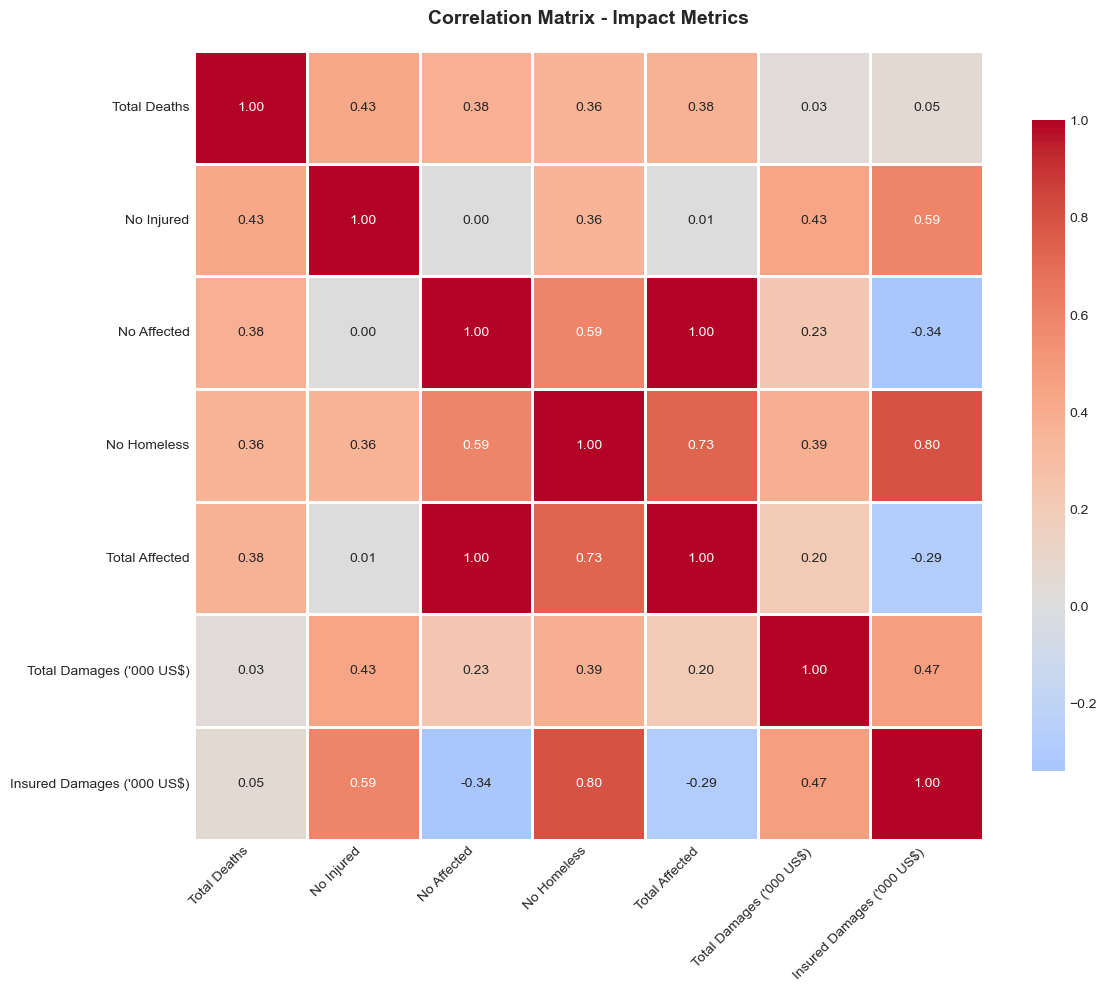

In [27]:
# Correlation matrix for impact metrics
impact_metrics_clean = df[['Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 
                             'Total Affected', 'Total Damages (\'000 US$)', 
                             'Insured Damages (\'000 US$)']].copy()

correlation_matrix = impact_metrics_clean.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Impact Metrics', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
# Find strongly correlated pairs
threshold = 0.7
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_correlations.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if strong_correlations:
    print("Strongly Correlated Variable Pairs (|r| > 0.7):")
    print("="*80)
    pd.DataFrame(strong_correlations).sort_values('Correlation', ascending=False)

Strongly Correlated Variable Pairs (|r| > 0.7):


## 11. Bivariate Analysis - Numerical vs Numerical

In [29]:
# Scatter plot: Total Deaths vs Total Damages - Interactive
data_clean = df[(df['Total Deaths'] > 0) & (df['Total Damages (\'000 US$)'] > 0)].copy()
data_clean2 = df[(df['No Affected'] > 0) & (df['Total Damages (\'000 US$)'] > 0)].copy()

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Deaths vs Economic Damages',
                                    'Affected People vs Economic Damages'))

# Deaths vs Damages
if len(data_clean) > 0:
    fig.add_trace(
        go.Scatter(x=np.log10(data_clean['Total Deaths']),
                   y=np.log10(data_clean['Total Damages (\'000 US$)']),
                   mode='markers',
                   marker=dict(color='darkblue', size=6, opacity=0.6),
                   name='Deaths vs Damages',
                   hovertemplate='<b>%{customdata[0]}</b><br>' +
                                 'Deaths: %{customdata[1]:,.0f}<br>' +
                                 'Damages: $%{customdata[2]:,.0f}k<br>' +
                                 'Year: %{customdata[3]}<extra></extra>',
                   customdata=data_clean[['Country', 'Total Deaths', 
                                         'Total Damages (\'000 US$)', 'Year']].values),
        row=1, col=1
    )

# Affected vs Damages
if len(data_clean2) > 0:
    fig.add_trace(
        go.Scatter(x=np.log10(data_clean2['No Affected']),
                   y=np.log10(data_clean2['Total Damages (\'000 US$)']),
                   mode='markers',
                   marker=dict(color='darkred', size=6, opacity=0.6),
                   name='Affected vs Damages',
                   hovertemplate='<b>%{customdata[0]}</b><br>' +
                                 'Affected: %{customdata[1]:,.0f}<br>' +
                                 'Damages: $%{customdata[2]:,.0f}k<br>' +
                                 'Year: %{customdata[3]}<extra></extra>',
                   customdata=data_clean2[['Country', 'No Affected',
                                          'Total Damages (\'000 US$)', 'Year']].values),
        row=1, col=2
    )

fig.update_xaxes(title_text="Log10(Total Deaths)", row=1, col=1)
fig.update_xaxes(title_text="Log10(No Affected)", row=1, col=2)
fig.update_yaxes(title_text="Log10(Total Damages)", row=1, col=1)
fig.update_yaxes(title_text="Log10(Total Damages)", row=1, col=2)

fig.update_layout(height=500, showlegend=False, template='plotly_white',
                  hovermode='closest')
fig.show()

In [30]:
# Deaths vs Injured scatter plot - Interactive
data_clean3 = df[(df['Total Deaths'] > 0) & (df['No Injured'] > 0)].copy()

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=np.log10(data_clean3['Total Deaths']),
               y=np.log10(data_clean3['No Injured']),
               mode='markers',
               marker=dict(color='purple', size=8, opacity=0.6,
                          line=dict(width=1, color='white')),
               name='Deaths vs Injuries',
               hovertemplate='<b>%{customdata[0]}</b><br>' +
                             'Disaster: %{customdata[1]}<br>' +
                             'Deaths: %{customdata[2]:,.0f}<br>' +
                             'Injured: %{customdata[3]:,.0f}<br>' +
                             'Year: %{customdata[4]}<extra></extra>',
               customdata=data_clean3[['Country', 'Disaster Type', 
                                      'Total Deaths', 'No Injured', 'Year']].values)
)

fig.update_layout(
    title='Relationship: Deaths vs Injuries',
    xaxis_title='Log10(Total Deaths)',
    yaxis_title='Log10(No Injured)',
    height=500,
    template='plotly_white',
    hovermode='closest'
)
fig.show()

## 12. Bivariate Analysis - Categorical vs Numerical

In [31]:
# Total Deaths by Disaster Type
deaths_by_type = df.groupby('Disaster Type')['Total Deaths'].agg(['sum', 'mean', 'median', 'count']).sort_values('sum', ascending=False)
deaths_by_type.columns = ['Total Deaths', 'Mean Deaths', 'Median Deaths', 'Event Count']
print("Impact by Disaster Type:")
print("="*80)
deaths_by_type

Impact by Disaster Type:


,Total Deaths,Mean Deaths,Median Deaths,Event Count
Disaster Type,,,,
Drought,867131.00,24775.17,237.00,35
Epidemic,499893.00,623.31,46.00,802
Flood,31664.00,40.18,13.00,788
Earthquake,21417.00,351.10,11.00,61
Storm,7835.00,37.67,11.00,208
Landslide,3146.00,55.19,17.00,57
Volcanic activity,2250.00,225.00,34.50,10
Wildfire,427.00,18.57,8.00,23
Extreme temperature,372.00,31.00,22.00,12


In [32]:
# Visualize deaths by disaster type - Interactive
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Total Deaths by Disaster Type',
                                    'Average Severity by Disaster Type'))

# Total deaths
fig.add_trace(
    go.Bar(y=deaths_by_type.index, x=deaths_by_type['Total Deaths'],
           orientation='h', marker_color='crimson', opacity=0.7,
           text=deaths_by_type['Total Deaths'].apply(lambda x: f'{x:,.0f}'),
           textposition='outside',
           hovertemplate='<b>%{y}</b><br>Total Deaths: %{x:,.0f}<br>' +
                         'Event Count: %{customdata[0]:,}<br>' +
                         'Median Deaths: %{customdata[1]:,.0f}<extra></extra>',
           customdata=deaths_by_type[['Event Count', 'Median Deaths']].values),
    row=1, col=1
)

# Mean deaths per event
fig.add_trace(
    go.Bar(y=deaths_by_type.index, x=deaths_by_type['Mean Deaths'],
           orientation='h', marker_color='orange', opacity=0.7,
           text=deaths_by_type['Mean Deaths'].apply(lambda x: f'{x:,.0f}'),
           textposition='outside',
           hovertemplate='<b>%{y}</b><br>Mean Deaths: %{x:,.0f}<br>' +
                         'Total Deaths: %{customdata[0]:,.0f}<br>' +
                         'Event Count: %{customdata[1]:,}<extra></extra>',
           customdata=deaths_by_type[['Total Deaths', 'Event Count']].values),
    row=1, col=2
)

fig.update_xaxes(title_text="Total Deaths", row=1, col=1)
fig.update_xaxes(title_text="Mean Deaths per Event", row=1, col=2)
fig.update_yaxes(title_text="Disaster Type", row=1, col=1)
fig.update_yaxes(title_text="Disaster Type", row=1, col=2)

fig.update_layout(height=500, showlegend=False, template='plotly_white',
                  hovermode='closest')
fig.show()

In [33]:
# Economic damages by disaster type - Interactive
damages_by_type = df.groupby('Disaster Type')['Total Damages (\'000 US$)'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
damages_by_type.columns = ['Total Damages (000 USD)', 'Mean Damages (000 USD)', 'Event Count']

fig = go.Figure()
fig.add_trace(
    go.Bar(y=damages_by_type.index,
           x=damages_by_type['Total Damages (000 USD)'],
           orientation='h', marker_color='green', opacity=0.7,
           text=damages_by_type['Total Damages (000 USD)'].apply(
               lambda x: f'${x/1e6:,.1f}M' if pd.notna(x) else 'N/A'),
           textposition='outside',
           hovertemplate='<b>%{y}</b><br>' +
                         'Total Damages: $%{x:,.0f}k<br>' +
                         'Mean Damages: $%{customdata[0]:,.0f}k<br>' +
                         'Event Count: %{customdata[1]:,}<extra></extra>',
           customdata=damages_by_type[['Mean Damages (000 USD)', 'Event Count']].values)
)

fig.update_layout(
    title='Economic Impact by Disaster Type',
    xaxis_title="Total Damages ('000 US$)",
    yaxis_title='Disaster Type',
    height=500,
    template='plotly_white',
    hovermode='closest'
)
fig.show()

In [34]:
# Box plot: Deaths by Continent - Interactive
continents = df['Continent'].dropna().unique()

fig = go.Figure()

colors = px.colors.qualitative.Set3
for i, continent in enumerate(sorted(continents)):
    continent_deaths = df[df['Continent'] == continent]['Total Deaths'].dropna()
    continent_deaths_clean = continent_deaths[continent_deaths > 0]
    if len(continent_deaths_clean) > 0:
        fig.add_trace(
            go.Box(x=np.log10(continent_deaths_clean + 1),
                   name=continent,
                   orientation='h',
                   marker_color=colors[i % len(colors)],
                   boxmean='sd',
                   hovertemplate='<b>' + continent + '</b><br>' +
                                 'Log10(Deaths+1): %{x:.2f}<extra></extra>')
        )

fig.update_layout(
    title='Death Toll Distribution by Continent',
    xaxis_title='Log10(Total Deaths + 1)',
    yaxis_title='Continent',
    height=500,
    showlegend=False,
    template='plotly_white',
    hovermode='closest'
)
fig.show()

## 13. Multivariate Analysis & Time Series Insights

In [35]:
# Disaster frequency over time by type
disaster_year_type = df.groupby(['Year', 'Disaster Type']).size().reset_index(name='Count')

fig = px.line(disaster_year_type, x='Year', y='Count', color='Disaster Type',
              title='Disaster Frequency Trends by Type Over Time',
              labels={'Count': 'Number of Events', 'Year': 'Year'},
              template='plotly_white')

fig.update_layout(
    title_font_size=16,
    title_font_family='Arial Black',
    hovermode='x unified',
    legend=dict(orientation='v', yanchor='top', y=1, xanchor='left', x=1.01)
)
fig.show()

In [36]:
# Cumulative deaths over time
yearly_deaths = df.groupby('Year')['Total Deaths'].sum().reset_index()
yearly_deaths['Cumulative Deaths'] = yearly_deaths['Total Deaths'].cumsum()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=yearly_deaths['Year'], y=yearly_deaths['Total Deaths'], 
           name='Annual Deaths', marker_color='crimson', opacity=0.6),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=yearly_deaths['Year'], y=yearly_deaths['Cumulative Deaths'], 
               name='Cumulative Deaths', mode='lines', line=dict(color='darkblue', width=3)),
    secondary_y=True
)

fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Annual Deaths", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Deaths", secondary_y=True)
fig.update_layout(title_text="Annual and Cumulative Death Toll from Disasters",
                  template='plotly_white',
                  hovermode='x unified')
fig.show()

In [37]:
# Heatmap: Disaster frequency by Continent and Type - Interactive
disaster_continent_type = df.groupby(['Continent', 'Disaster Type']).size().reset_index(name='Count')
pivot_table = disaster_continent_type.pivot(index='Continent', columns='Disaster Type', values='Count').fillna(0)

fig = go.Figure()
fig.add_trace(
    go.Heatmap(z=pivot_table.values,
               x=pivot_table.columns,
               y=pivot_table.index,
               colorscale='YlOrRd',
               text=pivot_table.values,
               texttemplate='%{text:.0f}',
               textfont={"size": 10},
               hovertemplate='<b>%{y}</b><br>' +
                             'Disaster Type: %{x}<br>' +
                             'Count: %{z:.0f}<extra></extra>',
               colorbar=dict(title="Count"))
)

fig.update_layout(
    title='Disaster Frequency: Continent vs Disaster Type',
    xaxis_title='Disaster Type',
    yaxis_title='Continent',
    height=600,
    template='plotly_white'
)
fig.show()

In [38]:
# Top 15 countries - Total impact analysis
top_countries = df['Country'].value_counts().head(15).index

country_impact = df[df['Country'].isin(top_countries)].groupby('Country').agg({
    'Total Deaths': 'sum',
    'No Injured': 'sum',
    'No Affected': 'sum',
    'Total Damages (\'000 US$)': 'sum',
    'Year': 'count'
}).reset_index()

country_impact.columns = ['Country', 'Total Deaths', 'Total Injured', 
                          'Total Affected', 'Total Damages', 'Event Count']
country_impact = country_impact.sort_values('Total Deaths', ascending=False)

print("Top 15 Most Affected Countries - Comprehensive Impact:")
print("="*100)
country_impact

Top 15 Most Affected Countries - Comprehensive Impact:


,Country,Total Deaths,Total Injured,Total Affected,Total Damages,Event Count
3,Ethiopia,416530.00,5378.00,87218370.00,1512176.00,121
14,Uganda,205073.00,1863.00,6581183.00,80171.00,104
8,Niger (the),195935.00,15683.00,33714917.00,282039.00,101
12,Sudan (the),163827.00,51109.00,34582225.00,808200.00,103
7,Mozambique,107060.00,14802.00,39291767.00,3384750.00,117
10,Somalia,50009.00,27626.00,34024886.00,182020.00,101
9,Nigeria,31310.00,116492.00,15188875.00,1093525.00,137
2,Congo (the Democratic Republic of the),17985.00,40084.00,3181266.00,31200.00,140
0,Algeria,11874.00,26945.00,1495528.00,11814846.00,89
13,"Tanzania, United Republic of",10466.00,79043.00,16144139.00,467790.00,114


In [39]:
# Interactive sunburst chart: Disaster Group -> Type -> Subtype
disaster_hierarchy = df.groupby(['Disaster Group', 'Disaster Type', 'Disaster Subtype']).size().reset_index(name='Count')
disaster_hierarchy = disaster_hierarchy.dropna()

fig = px.sunburst(disaster_hierarchy, 
                  path=['Disaster Group', 'Disaster Type', 'Disaster Subtype'], 
                  values='Count',
                  title='Disaster Taxonomy Hierarchy<br><sub>Group → Type → Subtype</sub>',
                  color='Count',
                  color_continuous_scale='RdYlBu_r')

fig.update_layout(title_font_size=16, title_font_family='Arial Black')
fig.show()

## 14. Feature Engineering and Transformations

In [40]:
# Create new features
df_enhanced = df.copy()

# Disaster duration (in days)
df_enhanced['Duration_Days'] = (
    (df_enhanced['End Year'] - df_enhanced['Start Year']) * 365 +
    (df_enhanced['End Month'].fillna(0) - df_enhanced['Start Month'].fillna(0)) * 30 +
    (df_enhanced['End Day'].fillna(0) - df_enhanced['Start Day'].fillna(0))
)

# Decade categorization
df_enhanced['Decade'] = (df_enhanced['Year'] // 10) * 10
df_enhanced['Decade_Label'] = df_enhanced['Decade'].astype(str) + 's'

# Severity category based on total deaths
def categorize_severity(deaths):
    if pd.isna(deaths) or deaths == 0:
        return 'No Deaths'
    elif deaths < 10:
        return 'Minor'
    elif deaths < 100:
        return 'Moderate'
    elif deaths < 1000:
        return 'Severe'
    else:
        return 'Catastrophic'

df_enhanced['Severity_Category'] = df_enhanced['Total Deaths'].apply(categorize_severity)

# Total human impact
df_enhanced['Total_Human_Impact'] = (
    df_enhanced['Total Deaths'].fillna(0) + 
    df_enhanced['No Injured'].fillna(0) + 
    df_enhanced['No Affected'].fillna(0)
)

print("New Features Created:")
print("  1. Duration_Days - Duration of disaster event")
print("  2. Decade - Decade categorization")
print("  3. Decade_Label - Human-readable decade label")
print("  4. Severity_Category - Death toll severity classification")
print("  5. Total_Human_Impact - Combined human impact metric")
print("\nSample of enhanced dataset:")
df_enhanced[['Year', 'Country', 'Disaster Type', 'Duration_Days', 
             'Decade_Label', 'Severity_Category', 'Total_Human_Impact']].head(10)

New Features Created:
  1. Duration_Days - Duration of disaster event
  2. Decade - Decade categorization
  3. Decade_Label - Human-readable decade label
  4. Severity_Category - Death toll severity classification
  5. Total_Human_Impact - Combined human impact metric

Sample of enhanced dataset:


,Year,Country,Disaster Type,Duration_Days,Decade_Label,Severity_Category,Total_Human_Impact
0,1900,Cabo Verde,Drought,0.00,1900s,Catastrophic,11000.00
1,1903,Comoros (the),Volcanic activity,0.00,1900s,Moderate,17.00
2,1910,Burkina Faso,Drought,1460.00,1910s,No Deaths,0.00
3,1910,Cabo Verde,Drought,1460.00,1910s,No Deaths,0.00
4,1910,Algeria,Earthquake,0.00,1910s,Moderate,12.00
5,1910,Gambia (the),Drought,1460.00,1910s,No Deaths,0.00
6,1910,Guinea-Bissau,Drought,1460.00,1910s,No Deaths,0.00
7,1920,Cabo Verde,Drought,0.00,1920s,Catastrophic,24000.00
8,1926,Egypt,Earthquake,0.00,1920s,Moderate,12.00
9,1927,Algeria,Flood,0.00,1920s,Catastrophic,3000.00


In [41]:
# Analyze disaster frequency by decade - Interactive
decade_analysis = df_enhanced.groupby('Decade_Label').agg({
    'Year': 'count',
    'Total Deaths': 'sum',
    'No Affected': 'sum',
    'Total Damages (\'000 US$)': 'sum'
}).reset_index()

decade_analysis.columns = ['Decade', 'Event Count', 'Total Deaths', 
                           'Total Affected', 'Total Damages (000 USD)']

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('Disaster Events by Decade',
                                    'Total Deaths by Decade',
                                    'Total Affected by Decade'))

# Event Count
fig.add_trace(
    go.Bar(x=decade_analysis['Decade'], y=decade_analysis['Event Count'],
           marker_color='steelblue',
           hovertemplate='<b>%{x}</b><br>Events: %{y:,}<extra></extra>'),
    row=1, col=1
)

# Total Deaths
fig.add_trace(
    go.Bar(x=decade_analysis['Decade'], y=decade_analysis['Total Deaths'],
           marker_color='crimson',
           hovertemplate='<b>%{x}</b><br>Deaths: %{y:,}<extra></extra>'),
    row=1, col=2
)

# Total Affected
fig.add_trace(
    go.Bar(x=decade_analysis['Decade'], y=decade_analysis['Total Affected'],
           marker_color='orange',
           hovertemplate='<b>%{x}</b><br>Affected: %{y:,}<extra></extra>'),
    row=1, col=3
)

fig.update_xaxes(title_text="Decade", row=1, col=1, tickangle=45)
fig.update_xaxes(title_text="Decade", row=1, col=2, tickangle=45)
fig.update_xaxes(title_text="Decade", row=1, col=3, tickangle=45)
fig.update_yaxes(title_text="Number of Events", row=1, col=1)
fig.update_yaxes(title_text="Total Deaths", row=1, col=2)
fig.update_yaxes(title_text="Total Affected", row=1, col=3)

fig.update_layout(height=400, showlegend=False, template='plotly_white')
fig.show()

In [42]:
# Severity distribution - Interactive
severity_dist = df_enhanced['Severity_Category'].value_counts()
severity_order = ['No Deaths', 'Minor', 'Moderate', 'Severe', 'Catastrophic']
severity_counts = [severity_dist.get(s, 0) for s in severity_order]
colors_severity = ['lightgray', 'yellow', 'orange', 'red', 'darkred']

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'bar'}, {'type': 'pie'}]],
                    subplot_titles=('Disaster Events by Severity', 'Severity Distribution (%)'))

# Bar chart
fig.add_trace(
    go.Bar(x=severity_order, y=severity_counts,
           marker_color=colors_severity, opacity=0.8,
           text=severity_counts,
           texttemplate='%{text:,}',
           textposition='outside',
           hovertemplate='<b>%{x}</b><br>Count: %{y:,}<br>Percentage: %{customdata:.1f}%<extra></extra>',
           customdata=(np.array(severity_counts) / sum(severity_counts) * 100)),
    row=1, col=1
)

# Enhanced Pie chart
fig.add_trace(
    go.Pie(labels=severity_order, values=severity_counts,
           marker=dict(colors=colors_severity, line=dict(color='white', width=3)),
           textposition='auto',
           textinfo='label+percent',
           hovertemplate='<b>%{label}</b><br>Count: %{value:,}<br>Percentage: %{percent}<extra></extra>',
           pull=[0.05 if s == 'Catastrophic' else 0 for s in severity_order]),
    row=1, col=2
)

fig.update_xaxes(title_text="Severity Category", row=1, col=1, tickangle=45)
fig.update_yaxes(title_text="Number of Events", row=1, col=1)

fig.update_layout(height=500, showlegend=False, template='plotly_white',
                  hovermode='closest')
fig.show()

## 15. Key Insights and Patterns

### Executive Summary of Findings

In [43]:
# Generate comprehensive insights
print("="*100)
print(" " * 35 + "KEY INSIGHTS SUMMARY")
print("="*100)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Total disaster events recorded: {len(df):,}")
print(f"  • Time period covered: {df['Year'].min():.0f} - {df['Year'].max():.0f} ({df['Year'].max() - df['Year'].min():.0f} years)")
print(f"  • Number of countries affected: {df['Country'].nunique()}")
print(f"  • Number of continents: {df['Continent'].nunique()}")
print(f"  • Disaster types tracked: {df['Disaster Type'].nunique()}")

print("\n🌍 GEOGRAPHIC INSIGHTS:")
most_affected_continent = df['Continent'].value_counts().index[0]
most_affected_country = df['Country'].value_counts().index[0]
print(f"  • Most affected continent: {most_affected_continent} ({df[df['Continent']==most_affected_continent].shape[0]:,} events)")
print(f"  • Most affected country: {most_affected_country} ({df[df['Country']==most_affected_country].shape[0]:,} events)")
print(f"  • Geographic spread: Events recorded across {df['Region'].nunique()} regions")

print("\n🔥 DISASTER TYPE INSIGHTS:")
top_disaster = df['Disaster Type'].value_counts().index[0]
top_disaster_count = df['Disaster Type'].value_counts().iloc[0]
print(f"  • Most frequent disaster type: {top_disaster} ({top_disaster_count:,} events, {top_disaster_count/len(df)*100:.1f}%)")
for i, (dtype, count) in enumerate(df['Disaster Type'].value_counts().head(5).items(), 1):
    print(f"    {i}. {dtype}: {count:,} events")

print("\n💀 HUMAN IMPACT INSIGHTS:")
total_deaths = df['Total Deaths'].sum()
total_injured = df['No Injured'].sum()
total_affected = df['No Affected'].sum()
print(f"  • Total deaths recorded: {total_deaths:,.0f}")
print(f"  • Total injured: {total_injured:,.0f}")
print(f"  • Total affected: {total_affected:,.0f}")
print(f"  • Average deaths per event: {df['Total Deaths'].mean():.0f}")

deadliest = df.nlargest(1, 'Total Deaths').iloc[0]
print(f"  • Deadliest single event: {deadliest['Event Name'] if pd.notna(deadliest['Event Name']) else deadliest['Disaster Type']}")
print(f"    - Year: {deadliest['Year']:.0f}, Country: {deadliest['Country']}, Deaths: {deadliest['Total Deaths']:,.0f}")

print("\n💰 ECONOMIC IMPACT INSIGHTS:")
total_damages = df['Total Damages (\'000 US$)'].sum()
print(f"  • Total economic damages: ${total_damages/1e6:,.1f} Billion USD")
print(f"  • Average damage per event: ${df['Total Damages (\'000 US$)'].mean()/1e3:,.0f} Million USD")

most_expensive = df.nlargest(1, 'Total Damages (\'000 US$)').iloc[0]
print(f"  • Most expensive disaster: {most_expensive['Event Name'] if pd.notna(most_expensive['Event Name']) else most_expensive['Disaster Type']}")
print(f"    - Year: {most_expensive['Year']:.0f}, Damage: ${most_expensive['Total Damages (\'000 US$)']/1e6:,.1f} Billion USD")

print("\n📈 TEMPORAL TRENDS:")
recent_decade = df[df['Year'] >= 2010].shape[0]
older_events = df[df['Year'] < 2010].shape[0]
print(f"  • Events since 2010: {recent_decade:,} ({recent_decade/len(df)*100:.1f}% of total)")
print(f"  • Events before 2010: {older_events:,} ({older_events/len(df)*100:.1f}% of total)")

yearly_trend = df.groupby('Year').size()
if len(yearly_trend) > 1:
    trend_direction = "increasing" if yearly_trend.iloc[-10:].mean() > yearly_trend.iloc[:10].mean() else "decreasing"
    print(f"  • Overall trend: Disaster reporting is {trend_direction} over time")

print("\n⚠️ DATA QUALITY OBSERVATIONS:")
high_missing = missing_data[missing_data['Missing_Percentage'] > 50]
print(f"  • Columns with >50% missing data: {len(high_missing)}")
print(f"  • Most complete variable: {missing_data.iloc[-1]['Column'] if len(missing_data) > 0 else 'N/A'}")
print(f"  • Data completeness: {(1 - df.isnull().sum().sum()/(len(df)*len(df.columns)))*100:.1f}%")

print("\n" + "="*100)

                                   KEY INSIGHTS SUMMARY

📊 DATASET OVERVIEW:
  • Total disaster events recorded: 2,946
  • Time period covered: 1900 - 2021 (121 years)
  • Number of countries affected: 56
  • Number of continents: 1
  • Disaster types tracked: 12

🌍 GEOGRAPHIC INSIGHTS:
  • Most affected continent: Africa (2,946 events)
  • Most affected country: Congo (the Democratic Republic of the) (140 events)
  • Geographic spread: Events recorded across 5 regions

🔥 DISASTER TYPE INSIGHTS:
  • Most frequent disaster type: Flood (1,147 events, 38.9%)
    1. Flood: 1,147 events
    2. Epidemic: 878 events
    3. Drought: 341 events
    4. Storm: 290 events
    5. Insect infestation: 77 events

💀 HUMAN IMPACT INSIGHTS:
  • Total deaths recorded: 1,434,369
  • Total injured: 853,513
  • Total affected: 605,367,733
  • Average deaths per event: 716
  • Deadliest single event: Drought
    - Year: 1983, Country: Ethiopia, Deaths: 300,000

💰 ECONOMIC IMPACT INSIGHTS:
  • Total economic d

## 16. Data Quality Assessment & Recommendations

### Final Assessment

In [44]:
print("="*100)
print(" " * 30 + "DATA QUALITY ASSESSMENT")
print("="*100)

print("\n✅ STRENGTHS:")
print("  • Comprehensive temporal coverage spanning over a century")
print("  • Rich categorical information (disaster types, geographic details)")
print("  • Multiple impact metrics (human and economic)")
print("  • Well-structured hierarchical disaster classification")
print("  • Good geographic coverage across continents and countries")

print("\n⚠️ LIMITATIONS:")
print("  • Significant missing data in impact metrics (deaths, injuries, damages)")
print("  • Historical bias - older events may be under-reported")
print("  • Economic damage data heavily incomplete")
print("  • Variable data quality across different time periods")
print("  • Some categorical fields have high cardinality")

print("\n🎯 ACTIONABLE INSIGHTS:")
print("  1. DISASTER PREPAREDNESS:")
print("     - Focus on most frequent disaster types (floods, storms, earthquakes)")
print("     - Prioritize regions with highest historical impact")
print("     - Develop targeted early warning systems")

print("\n  2. RESOURCE ALLOCATION:")
print("     - Allocate emergency resources based on disaster type severity patterns")
print("     - Consider geographic vulnerability when planning relief operations")
print("     - Invest in infrastructure resilience for high-risk areas")

print("\n  3. POLICY RECOMMENDATIONS:")
print("     - Improve disaster reporting standards for better data completeness")
print("     - Standardize economic impact assessment methodologies")
print("     - Enhance international cooperation for disaster data sharing")

print("\n  4. RISK MANAGEMENT:")
print("     - Develop risk models based on historical patterns")
print("     - Create vulnerability indices for different regions")
print("     - Implement proactive mitigation strategies for high-risk disaster types")

print("\n📋 NEXT STEPS FOR ANALYSIS:")
print("  • Develop predictive models for disaster occurrence and impact")
print("  • Perform clustering analysis to identify disaster-prone regions")
print("  • Create risk assessment frameworks based on historical data")
print("  • Build interactive dashboards for real-time monitoring")
print("  • Integrate with climate data for future projections")
print("  • Conduct cost-benefit analysis of mitigation strategies")

print("\n" + "="*100)
print("                    END OF EXPLORATORY DATA ANALYSIS")
print("="*100)

                              DATA QUALITY ASSESSMENT

✅ STRENGTHS:
  • Comprehensive temporal coverage spanning over a century
  • Rich categorical information (disaster types, geographic details)
  • Multiple impact metrics (human and economic)
  • Well-structured hierarchical disaster classification
  • Good geographic coverage across continents and countries

⚠️ LIMITATIONS:
  • Significant missing data in impact metrics (deaths, injuries, damages)
  • Historical bias - older events may be under-reported
  • Economic damage data heavily incomplete
  • Variable data quality across different time periods
  • Some categorical fields have high cardinality

🎯 ACTIONABLE INSIGHTS:
  1. DISASTER PREPAREDNESS:
     - Focus on most frequent disaster types (floods, storms, earthquakes)
     - Prioritize regions with highest historical impact
     - Develop targeted early warning systems

  2. RESOURCE ALLOCATION:
     - Allocate emergency resources based on disaster type severity patterns
  

In [45]:
df.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='str')

In [52]:
# i need to know unique values in country column print values in country column
unique_countries = df['Country'].unique()
print(unique_countries)


<StringArray>
[                                  'Cabo Verde',
                                'Comoros (the)',
                                 'Burkina Faso',
                                      'Algeria',
                                 'Gambia (the)',
                                'Guinea-Bissau',
                                        'Egypt',
                                        'Ghana',
                                     'Ethiopia',
                                     'Botswana',
                                  'Congo (the)',
                                        'Benin',
                                'Côte d’Ivoire',
                                     'Cameroon',
                     'Central African Republic',
                                     'Djibouti',
                                      'Burundi',
                                       'Uganda',
                                  'Niger (the)',
                                      'Morocco',
      